<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=c4635a8faa7e62b49cfc9b0064c9612077bc49e28c9dfb258db6dc66050b39b6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
from sklearn.datasets import make_blobs

In [29]:
X, y = make_blobs(centers=4, random_state=8)

In [30]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, mglearn

In [31]:
np.unique(y)

array([0, 1, 2, 3])

In [32]:
y = y % 2

Text(0, 0.5, 'Feature 1')

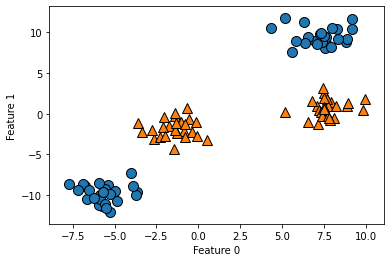

In [34]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [35]:
from sklearn.svm import LinearSVC

In [36]:
linear_svm = LinearSVC().fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'Feature 0')

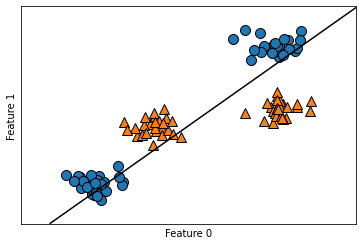

In [37]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.ylabel('Feature 1')
plt.xlabel('Feature 0')

**Other kind of plot**

In [38]:
X_new = np.hstack([X, X[:, 1:] ** 2])

In [39]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

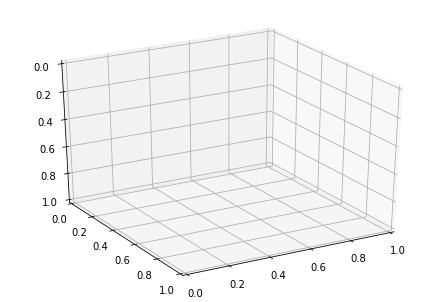

In [41]:
figure  = plt.figure()

ax = Axes3D(figure, elev=-152)

In [44]:
mask = y == 0
mask

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False])

Text(0.5, 0, 'feature1 **2')

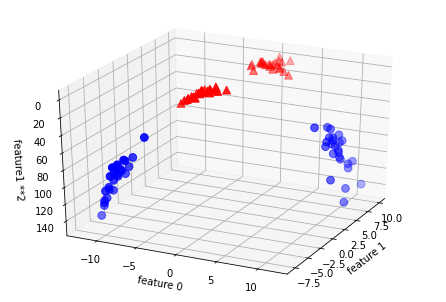

In [53]:
figure  = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_ylabel('feature 0')
ax.set_xlabel('feature 1')
ax.set_zlabel('feature1 **2')

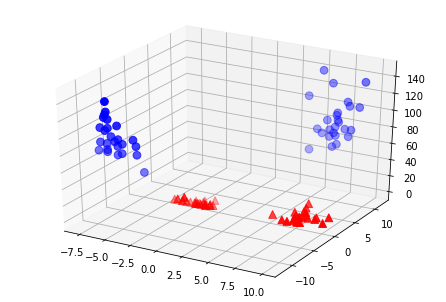

In [52]:
figure  = plt.figure()

ax = Axes3D(figure)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature0 ** 2')

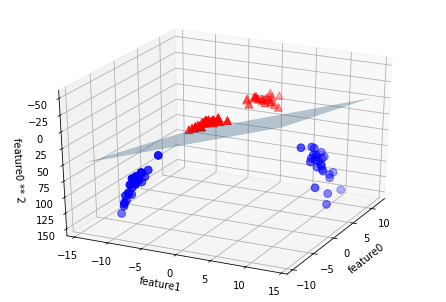

In [54]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

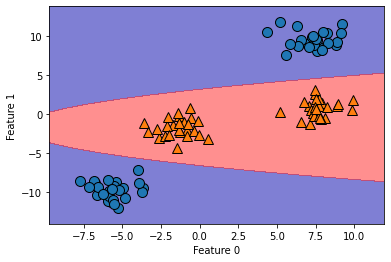

In [55]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")